# Find a short-term forecast on the electricity consumption of a single home #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # for regression
from sklearn.cluster import KMeans # for clustering

# Importing a massive text file via dictionary

We specify the data types to deal with mixed types of columns and handle any potential issues like missing values more accurately when reading the txt file as CSV.

We can the Data Dictionary from the link below on specifying said data types.|

A special thanks to Data Science Dojo for providing this publicly available dataset - https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Individual%20Household%20Electric%20Power%20Consumption

In [2]:
# Define the data types for each column
data_types = {
    'quarter': int,
    'stock': str,
    'date': int,
    'open': float,
    'high': float,
    'low': float,
    'close': float,
    'volume': int,
    'percent_change_price': float,
    'percent_change_volume_over_last_wk': float,
    'previous_weeks_volume': int,
    'next_weeks_open': float,
    'next_weeks_close': float,
    'percent_change_next_weeks_price': float,
    'days_to_next_dividend': int,
    'percent_return_next_dividend':float
}

In [3]:
# define missing value markers (if any)
missing_values = ['?']

In [4]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';', dtype=data_types, na_values=missing_values)

In [5]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [7]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
data.describe()

# this gives you statistics of the data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
data.isnull()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2075254,False,False,False,False,False,False,False,False,False
2075255,False,False,False,False,False,False,False,False,False
2075256,False,False,False,False,False,False,False,False,False
2075257,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis (EDA)

let's use Matplotlib and Seaborn now that there's no missing values in the dataset

In [12]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [6]:
# convert and combine 'Date' and 'Time' into a single datetime column
# then set the new 'timestamp' column as the index

data['timestamp'] = data['Date'] + ' ' + data['Time']
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

In [7]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
# using .resample to create 3 dataframes pertaining...
#...3 time intervals

# but got an error as shown as in the output.
# date and time are not merged and has not been formatted as
#...as proper date and time as well as not as the index yet
# Now after creating and indexing timestamp...

hourly_data = data[['Global_active_power', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']].resample('1H').mean()

In [ ]:
# The statsmodel functions CANNOT handle missing values
#..so its necessary to interpolate 
# interpolate = estimates missing values by making educated guesses

hourly_data['Global_active_power'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_1'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_2'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_3'].interpolate(method='linear', inplace=True)

In [9]:
hourly_data

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
timestamp,,,,
2006-12-16 17:00:00,4.222889,0.00,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.00,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.00,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.00,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.00,0.416667,17.216667
...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.35,0.000000,13.133333
2010-12-11 20:00:00,1.753333,8.05,1.100000,10.066667
2010-12-11 21:00:00,1.114900,8.55,0.450000,0.000000


# The Many Data Visualisation Plots....

Let's explore the time series patterns, trends, seasonality and anomalies in the electricity consumption data; identify important features and relationships within the data BEFORE we carry out 'Feature Engineering' process.

It is necessary to interpolate the data first using the following = data[''].interpolate(method='linear', inplace=True)

In [11]:
# Time series analysis
# Extract the year from the date using datetime index since timestamp is an index
hourly_data['year'] = hourly_data.index.year

In [12]:
hourly_data

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
timestamp,,,,,
2006-12-16 17:00:00,4.222889,0.00,0.527778,16.861111,2006
2006-12-16 18:00:00,3.632200,0.00,6.716667,16.866667,2006
2006-12-16 19:00:00,3.400233,0.00,1.433333,16.683333,2006
2006-12-16 20:00:00,3.268567,0.00,0.000000,16.783333,2006
2006-12-16 21:00:00,3.056467,0.00,0.416667,17.216667,2006
...,...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.35,0.000000,13.133333,2010
2010-12-11 20:00:00,1.753333,8.05,1.100000,10.066667,2010
2010-12-11 21:00:00,1.114900,8.55,0.450000,0.000000,2010


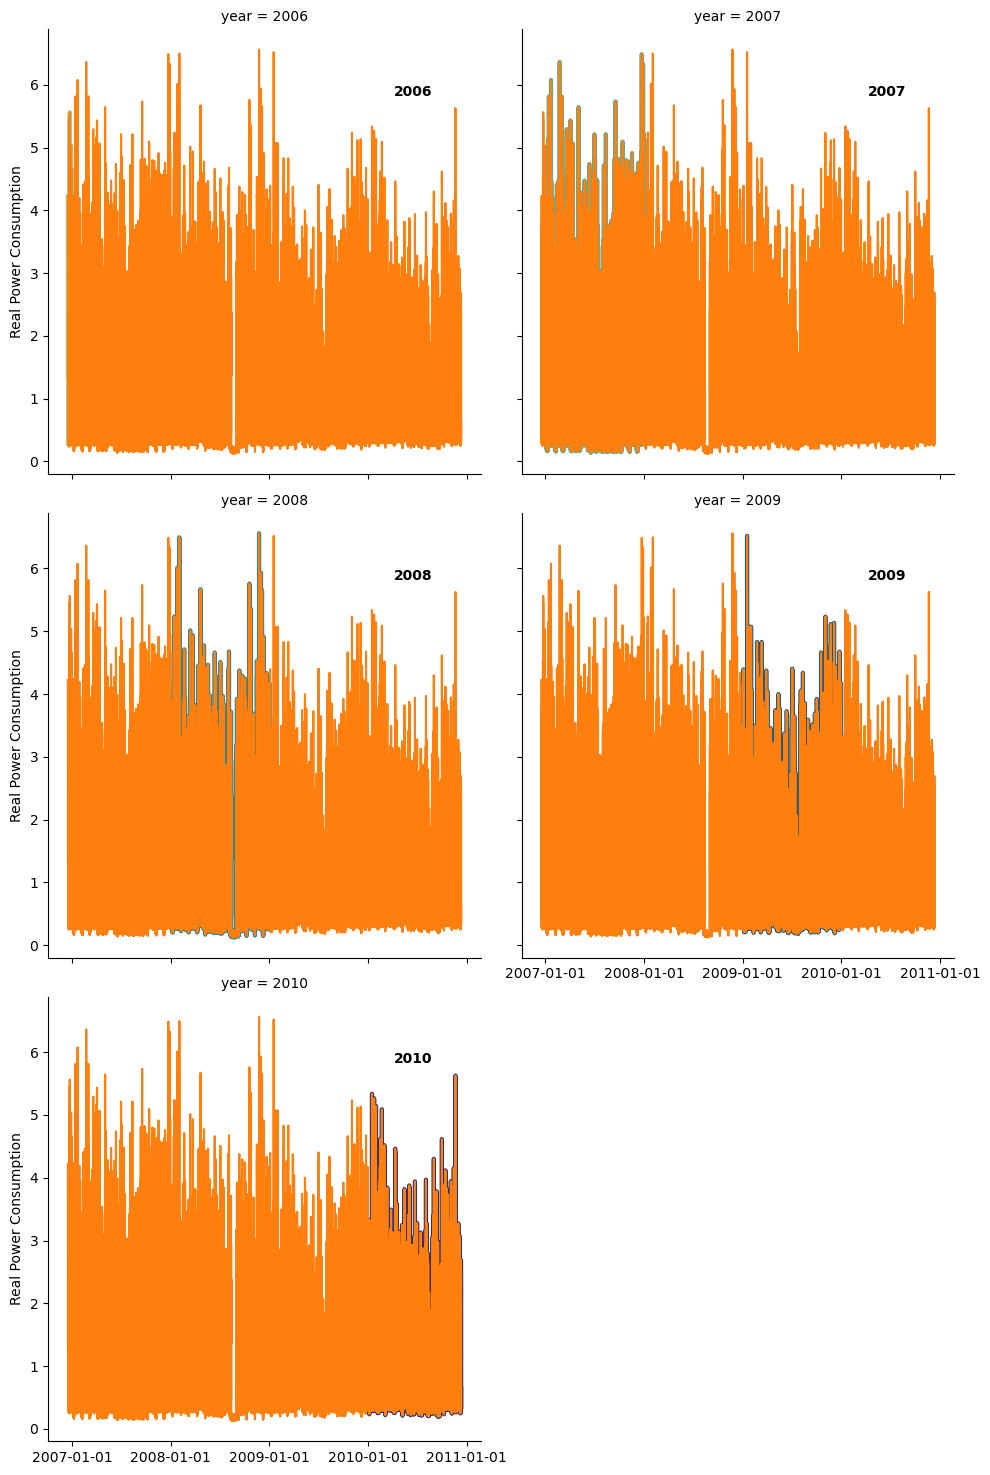

In [13]:
# hourly_data -> global active power first
hourly_yearly = sns.relplot(hourly_data, x='timestamp', 
                          y='Global_active_power', 
                          col='year', hue ='year',
                          kind='line', palette='crest',
                         linewidth=3.0, zorder=2,
                         col_wrap=2, height=5, aspect= 1, legend=False)

hourly_yearly.set_axis_labels('One Hour Interval', 'Global Active Power')

for year, ax in hourly_yearly.axes_dict.items():
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
    hourly_data, x='timestamp', y='Global_active_power', units='year',
    estimator=None, linewidth=1.5, ax=ax,
    )
    
ax.set_xticks(ax.get_xticks()[::2])

hourly_yearly.fig.suptitle("")
hourly_yearly.set_axis_labels("","Real Power Consumption")
hourly_yearly.tight_layout()

plt.show()

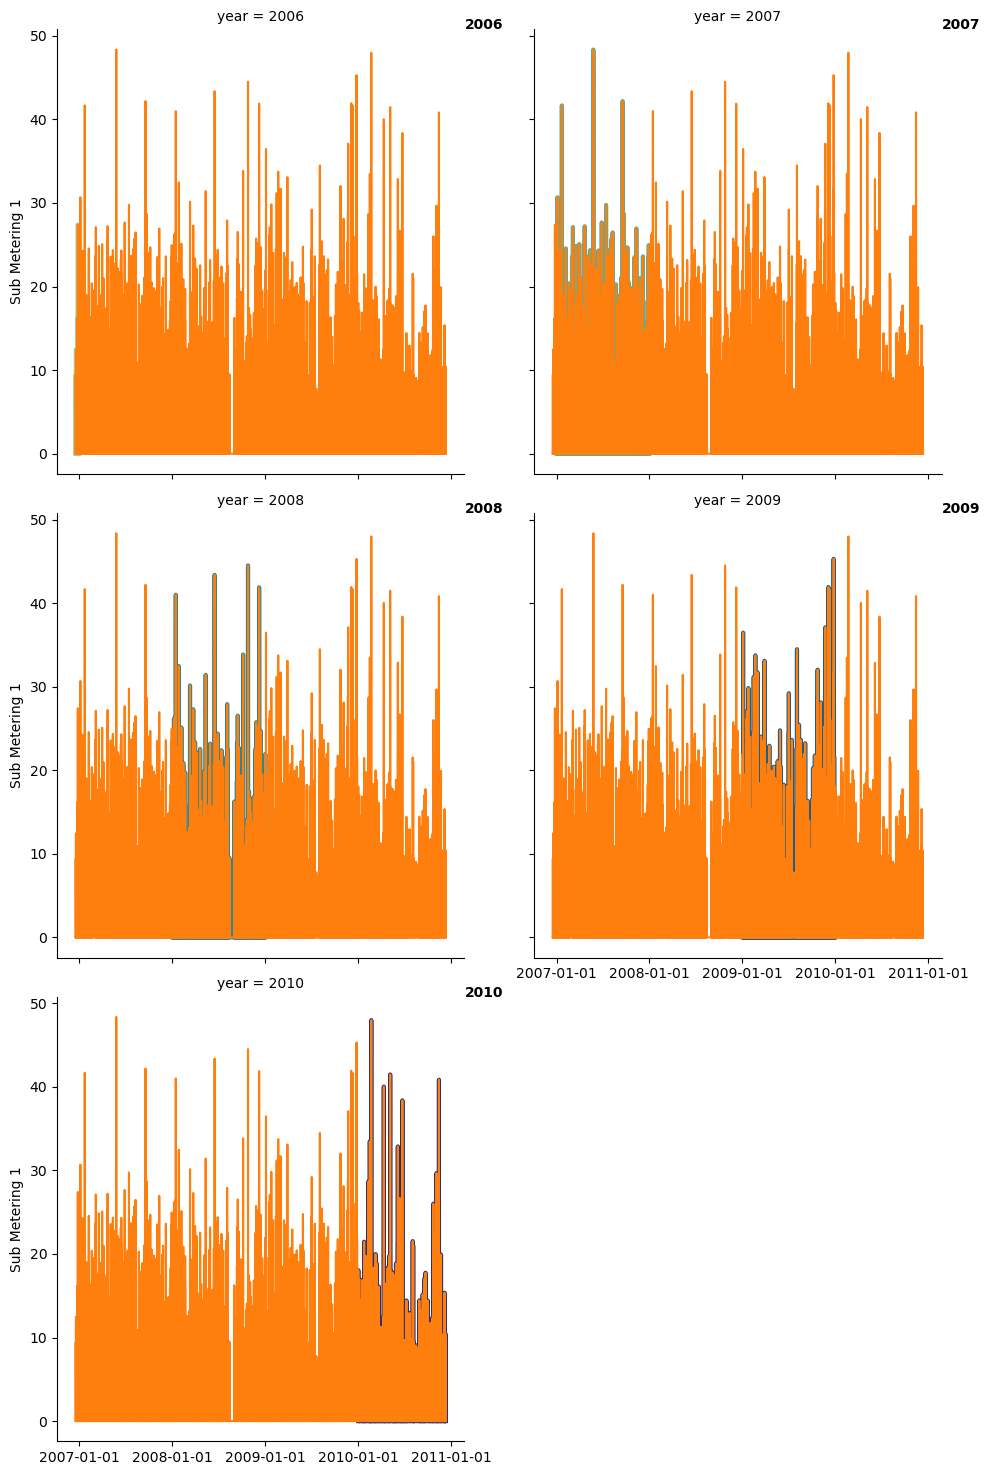

In [38]:
# hourly_data -> sub_metering 1
hourly_yearly = sns.relplot(hourly_data, x='timestamp', 
                          y='Sub_metering_1', 
                          col='year', hue ='year',
                          kind='line', palette='crest',
                         linewidth=3.0, zorder=2,
                         col_wrap=2, height=5, aspect= 1, legend=False)

hourly_yearly.set_axis_labels('One Hour Interval', 'Sub Metering 1')

for year, ax in hourly_yearly.axes_dict.items():
    ax.text(1.0, 1.0, year, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
    hourly_data, x='timestamp', y='Sub_metering_1', units='year',
    estimator=None, linewidth=1.5, ax=ax,
    )
    
ax.set_xticks(ax.get_xticks()[::2])

hourly_yearly.fig.suptitle("")
hourly_yearly.set_axis_labels("","Sub Metering 1")
hourly_yearly.tight_layout()

plt.show()

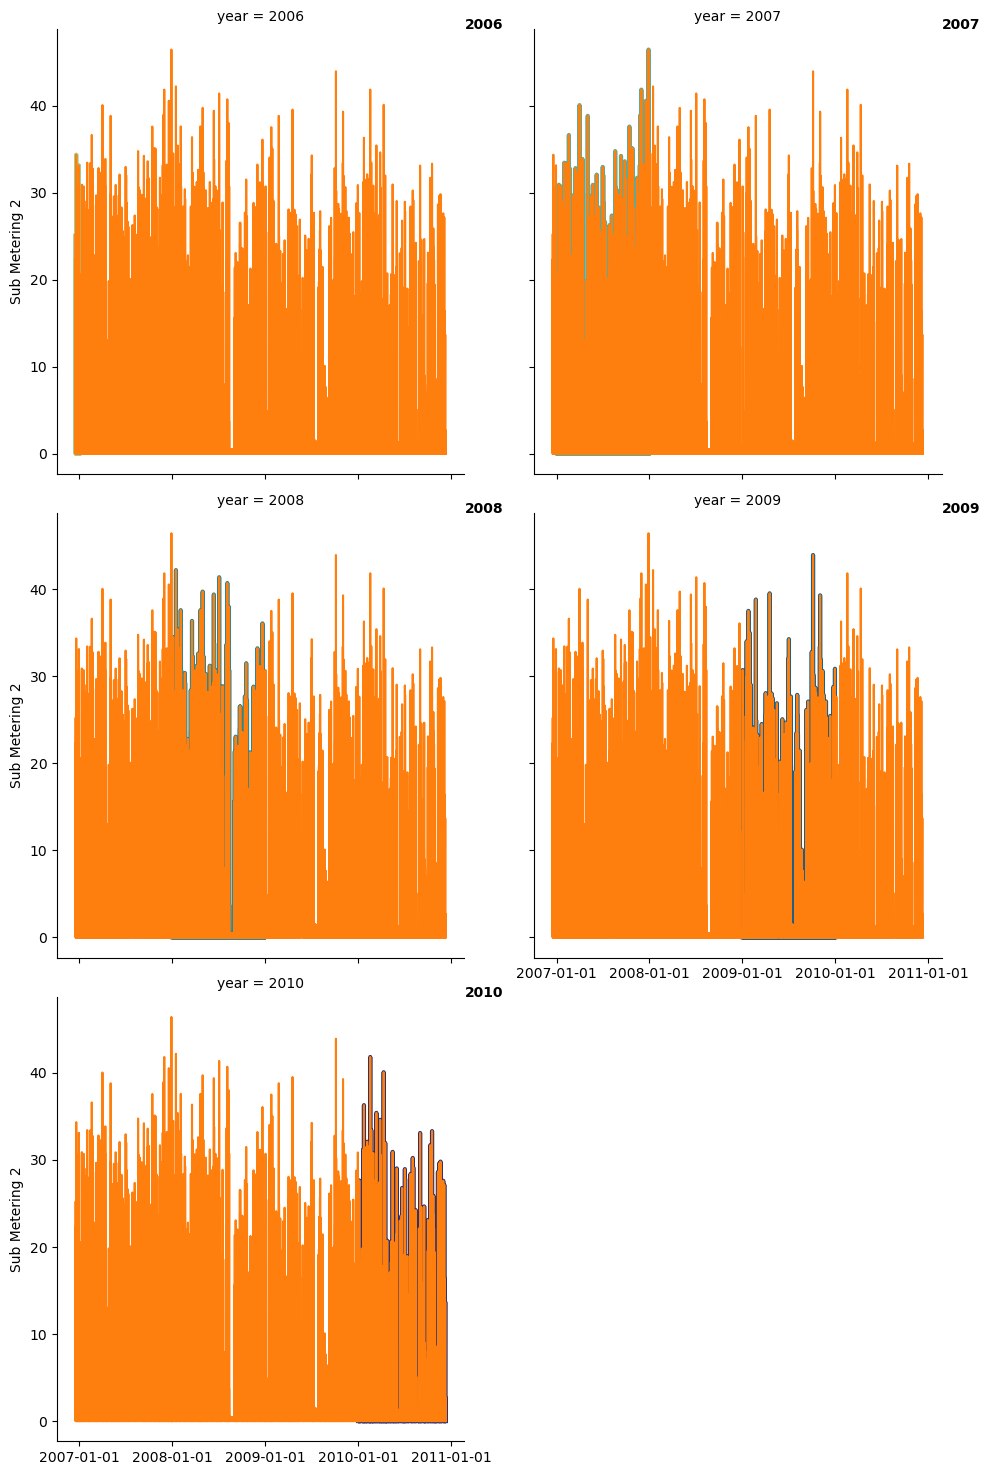

In [36]:
# hourly_data -> sub_metering 2
hourly_yearly = sns.relplot(hourly_data, x='timestamp', 
                          y='Sub_metering_2', 
                          col='year', hue ='year',
                          kind='line', palette='crest',
                         linewidth=3.0, zorder=2,
                         col_wrap=2, height=5, aspect= 1, legend=False)

hourly_yearly.set_axis_labels('One Hour Interval', 'Sub Metering 2')

for year, ax in hourly_yearly.axes_dict.items():
    ax.text(1.0, 1.0, year, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
    hourly_data, x='timestamp', y='Sub_metering_2', units='year',
    estimator=None, linewidth=1.5, ax=ax,
    )
    
ax.set_xticks(ax.get_xticks()[::2])

hourly_yearly.fig.suptitle("")
hourly_yearly.set_axis_labels("","Sub Metering 2")
hourly_yearly.tight_layout()

plt.show()

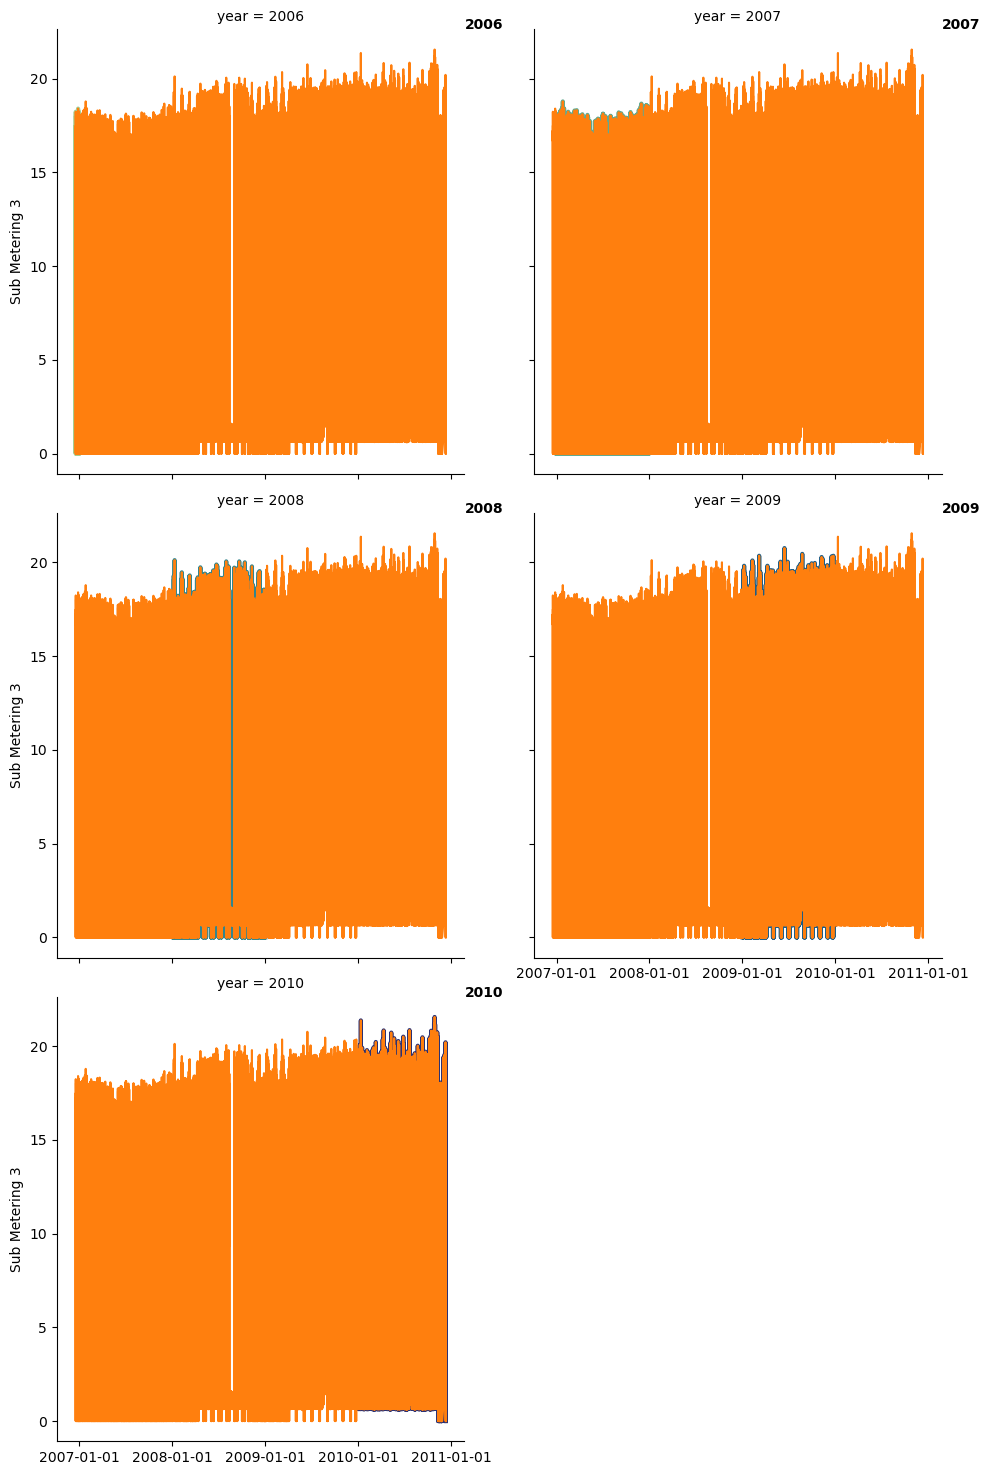

In [41]:
# hourly_data -> sub_metering 3
hourly_yearly = sns.relplot(hourly_data, x='timestamp', 
                          y='Sub_metering_3', 
                          col='year', hue ='year',
                          kind='line', palette='crest',
                         linewidth=3.0, zorder=2,
                         col_wrap=2, height=5, aspect= 1, legend=False)

hourly_yearly.set_axis_labels('One Hour Interval', 'Sub Metering 3')

for year, ax in hourly_yearly.axes_dict.items():
    ax.text(1.0, 1.0, year, transform=ax.transAxes, fontweight="bold")
    sns.lineplot(
    hourly_data, x='timestamp', y='Sub_metering_3', units='year',
    estimator=None, linewidth=1.5, ax=ax,
    )
    
ax.set_xticks(ax.get_xticks()[::2])

hourly_yearly.fig.suptitle("")
hourly_yearly.set_axis_labels("","Sub Metering 3")
hourly_yearly.tight_layout()

plt.show()

In [47]:
# hourly_data -> global active power first
hourly_yearly = sns.relplot(hourly_data, x='timestamp', 
                          y='Global_active_power', 
                          col='year', hue ='year',
                          kind='lag', palette='crest',
                         linewidth=3.0, zorder=2,
                         col_wrap=2, height=5, aspect= 1, legend=False)

hourly_yearly.set_axis_labels('One Hour Interval', 'Global Active Power')

hourly_yearly.fig.suptitle("")
hourly_yearly.set_axis_labels("","Real Power Consumption")
hourly_yearly.tight_layout()

plt.show()

ValueError: Plot kind lag not recognized

The kind='decomposition' and 'lag' parameters are not recognized as an option in the sns.relplot function. The kind parameter typically accepts values like 'scatter', 'line', 'hist', etc., which correspond to different types of plots. The 'decomposition' kind is not a standard option for relplot.

Lets use statsmodels

In [13]:
import statsmodels.api as sm

In [11]:
# The statsmodel functions CANNOT handle missing values
#..so its necessary to interpolate 
# interpolate = estimates missing values by making educated guesses

hourly_data['Global_active_power'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_1'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_2'].interpolate(method='linear', inplace=True)
hourly_data['Sub_metering_3'].interpolate(method='linear', inplace=True)

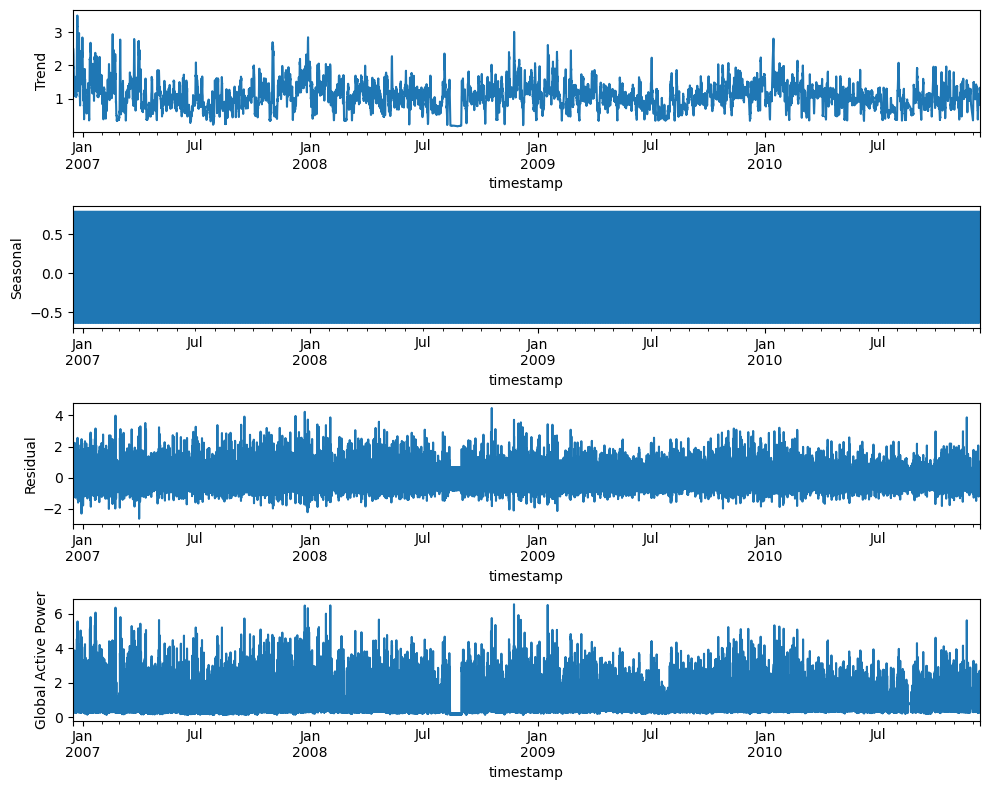

In [14]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(hourly_data['Global_active_power'], model='additive')

# Plot the decomposition results by 4 vertical grids (4x1)
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.trend.plot(ax=axes[0])
decomposition.seasonal.plot(ax=axes[1])
decomposition.resid.plot(ax=axes[2])
hourly_data['Global_active_power'].plot(ax=axes[3])
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residual')
axes[3].set_ylabel('Global Active Power')
plt.tight_layout()
plt.show()

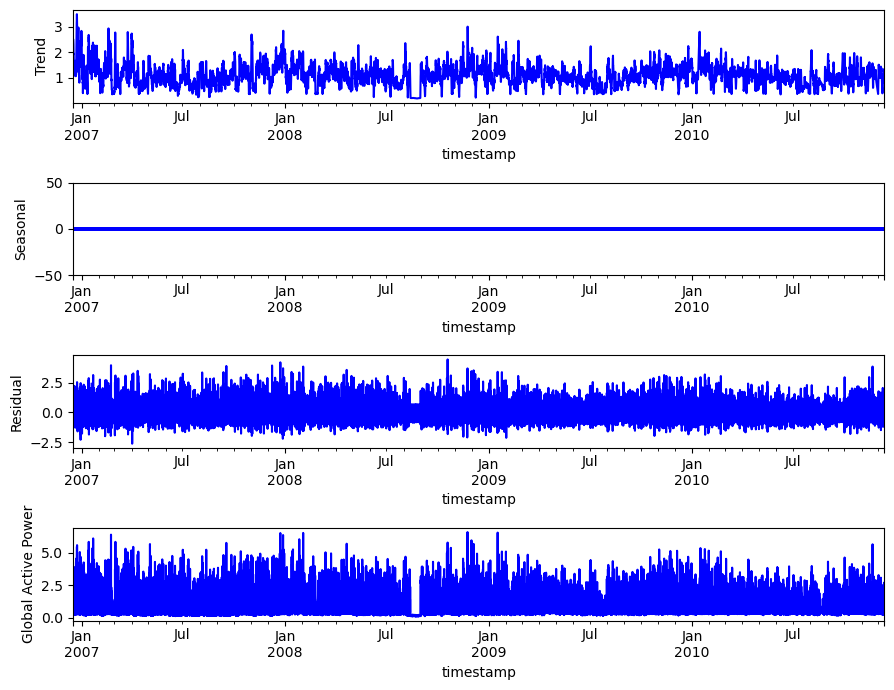

In [15]:
# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(hourly_data['Global_active_power'], model='additive')

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(9, 7))
decomposition.trend.plot(ax=axes[0], color='blue')
decomposition.seasonal.plot(ax=axes[1], color='blue')
decomposition.resid.plot(ax=axes[2], color='blue')
hourly_data['Global_active_power'].plot(ax=axes[3], color='blue')
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residual')
axes[3].set_ylabel('Global Active Power')

# set custom y-axis limits for the seasonal component
axes[1].set_ylim(-50,50)

plt.tight_layout()
plt.show()

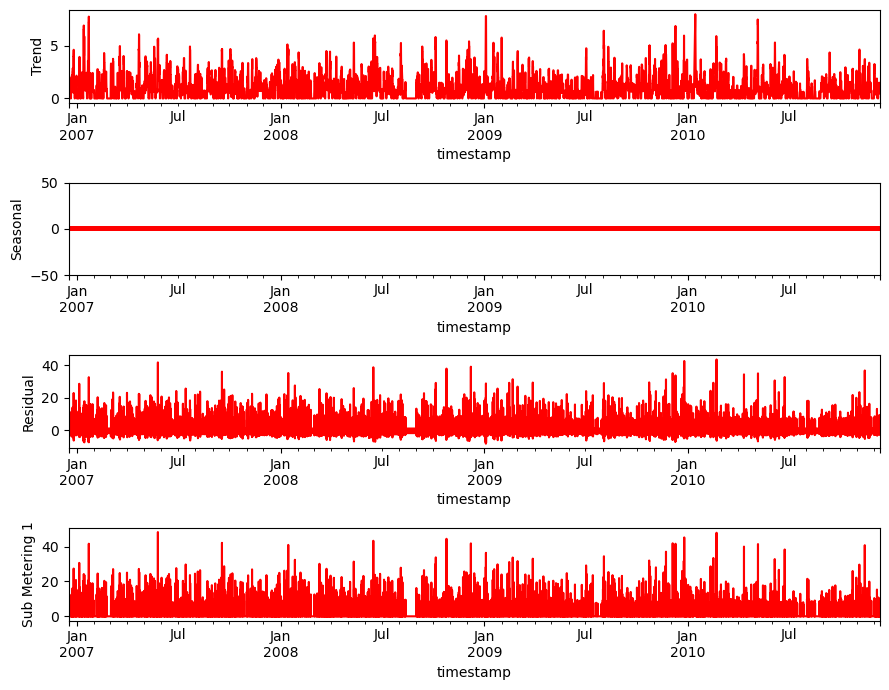

In [78]:
# Now lets do sub_metering_1

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(hourly_data['Sub_metering_1'], model='additive')

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(9, 7))
decomposition.trend.plot(ax=axes[0], color='red')
decomposition.seasonal.plot(ax=axes[1], color='red')
decomposition.resid.plot(ax=axes[2], color='red')
hourly_data['Sub_metering_1'].plot(ax=axes[3], color='red')
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residual')
axes[3].set_ylabel('Sub Metering 1')

# set custom y-axis limits for the seasonal component
axes[1].set_ylim(-50,50)

plt.tight_layout()
plt.show()


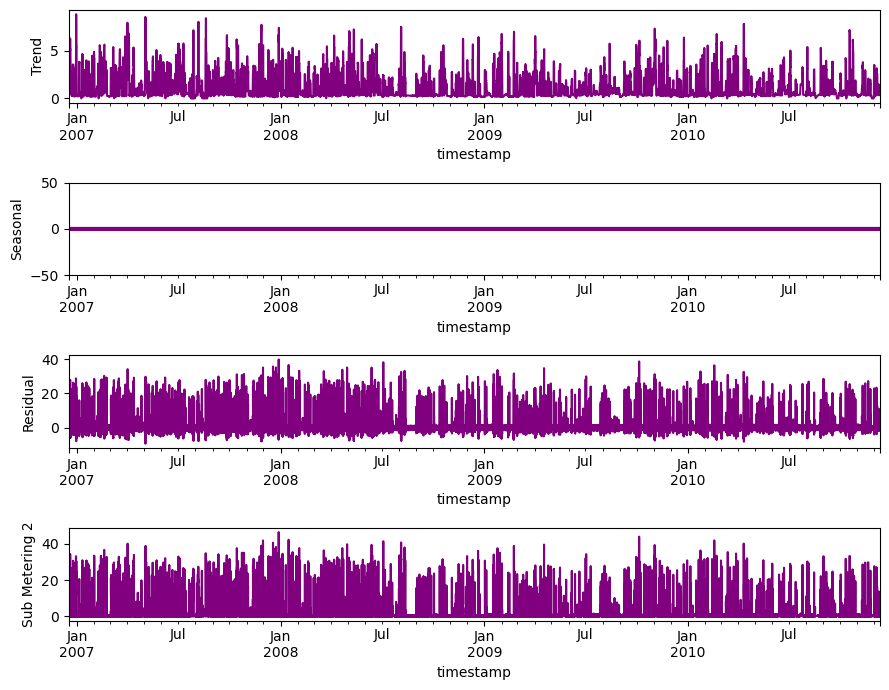

In [80]:
# Now lets do sub_metering_2

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(hourly_data['Sub_metering_2'], model='additive')

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(9, 7))
decomposition.trend.plot(ax=axes[0], color='purple')
decomposition.seasonal.plot(ax=axes[1], color='purple')
decomposition.resid.plot(ax=axes[2], color='purple')
hourly_data['Sub_metering_2'].plot(ax=axes[3], color='purple')
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residual')
axes[3].set_ylabel('Sub Metering 2')

# set custom y-axis limits for the seasonal component
axes[1].set_ylim(-50,50)

plt.tight_layout()
plt.show()

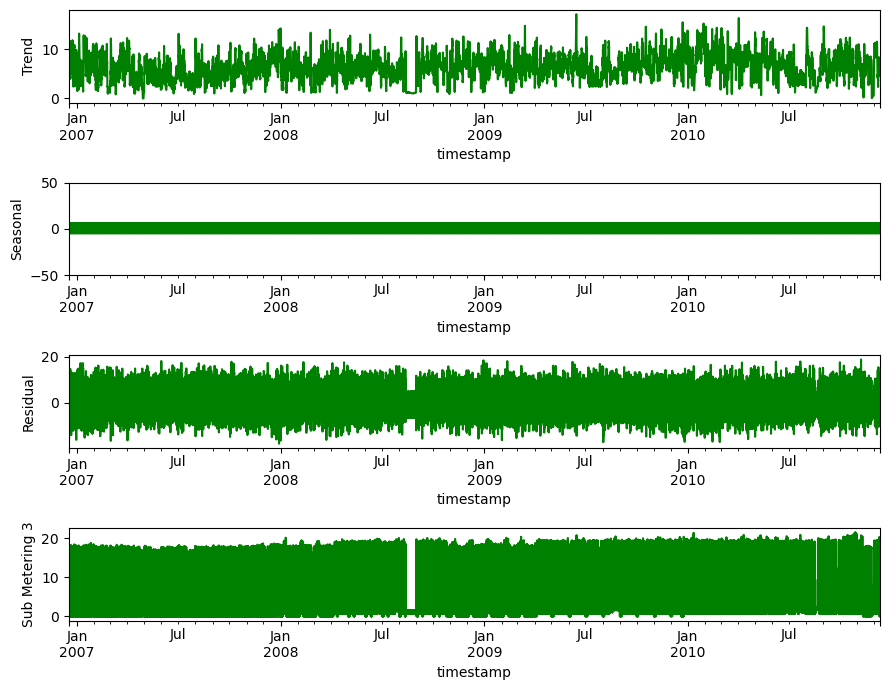

In [81]:
# Now lets do sub_metering_3

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(hourly_data['Sub_metering_3'], model='additive')

# Plot the decomposition results
fig, axes = plt.subplots(4, 1, figsize=(9, 7))
decomposition.trend.plot(ax=axes[0], color='green')
decomposition.seasonal.plot(ax=axes[1], color='green')
decomposition.resid.plot(ax=axes[2], color='green')
hourly_data['Sub_metering_3'].plot(ax=axes[3], color='green')
axes[0].set_ylabel('Trend')
axes[1].set_ylabel('Seasonal')
axes[2].set_ylabel('Residual')
axes[3].set_ylabel('Sub Metering 3')

# set custom y-axis limits for the seasonal component
axes[1].set_ylim(-50,50)

plt.tight_layout()
plt.show()

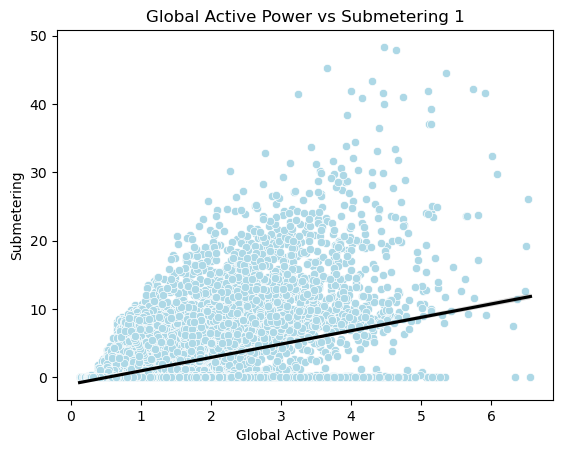

In [98]:
# create a scatter plot for global active power vs submetering 1
#...with a regression line to see the relationship between them
# in the form of three subplots in a vertical layout of a figure

# let's do one by one
# global active power vs submetering 1
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_1', color='lightblue')
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_1', color='black', scatter=False)

plt.title('Global Active Power vs Submetering 1')
plt.xlabel('Global Active Power')
plt.ylabel('Submetering')

plt.show()

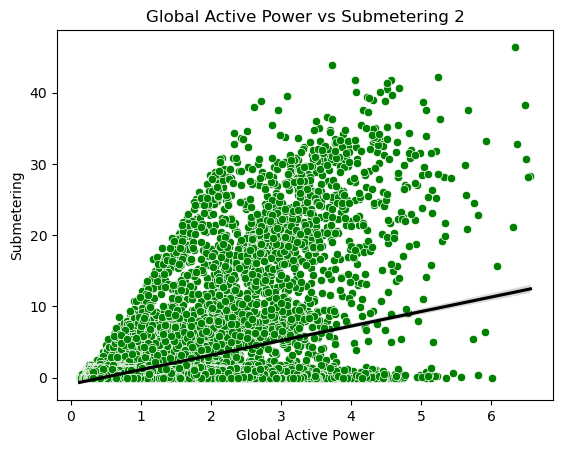

In [96]:
# global active power vs submetering 2
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_2', color='green')
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_2', color='black', scatter=False)


plt.title('Global Active Power vs Submetering 2')
plt.xlabel('Global Active Power')
plt.ylabel('Submetering')

plt.show()

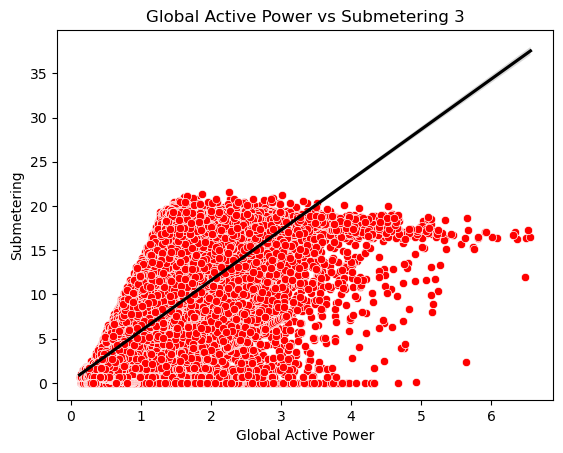

In [97]:
# global active power vs submetering 3
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_3', color='red')
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_3', color='black', scatter=False)

plt.title('Global Active Power vs Submetering 3')
plt.xlabel('Global Active Power')
plt.ylabel('Submetering')

plt.show()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

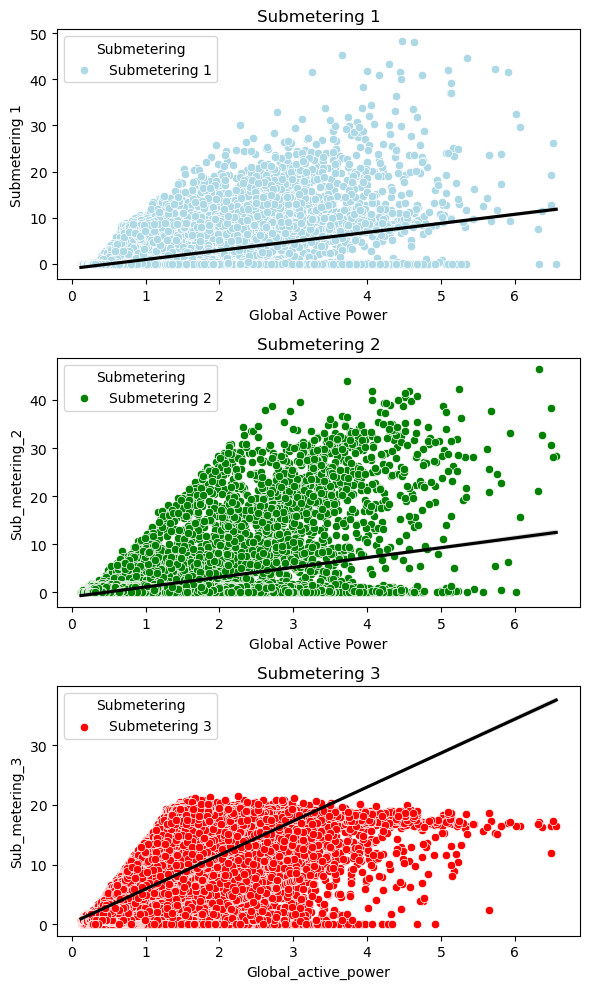

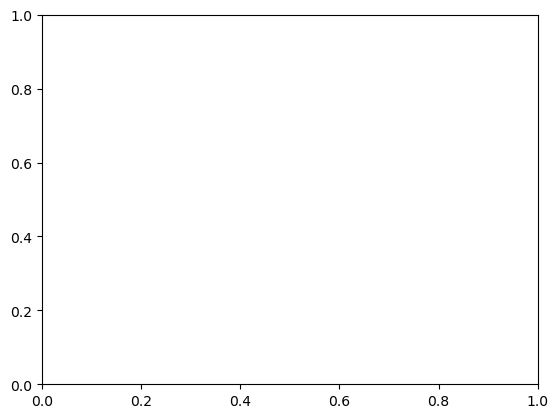

In [101]:
# create a scatter plot for global active power vs submetering 1
#...with a regression line to see the relationship between them
# in the form of three subplots in a vertical layout of a figure

# figure with 3 plots in a vertical lyout
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# global active power vs submetering 1
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_1', color='lightblue', label='Submetering 1', ax=axes[0])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_1', color='black', scatter=False, ax=axes[0])

# global active power vs submetering 2
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_2', color='green', label='Submetering 2', ax=axes[1])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_2', color='black', scatter=False, ax=axes[1])

# global active power vs submetering 3
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_3', color='red', label='Submetering 3', ax=axes[2])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_3', color='black', scatter=False, ax=axes[2])

# add legend, titles and label for each
axes[0].legend(title='Submetering')
axes[1].legend(title='Submetering')
axes[2].legend(title='Submetering')

axes[0].set_title('Submetering 1')
axes[0].set_xlabel('Global Active Power')
axes[0].set_ylabel('Submetering 1')

axes[1].set_title('Submetering 2')
axes[1].set_xlabel('Global Active Power')
axes[1].set_title('Submetering 2')

axes[2].set_title('Submetering 3')
axes[2].set_title('Global Active Power')
axes[2].set_title('Submetering 3')

plt.tight_layout()

plt.subplots()

IndexError: index 3 is out of bounds for axis 0 with size 3

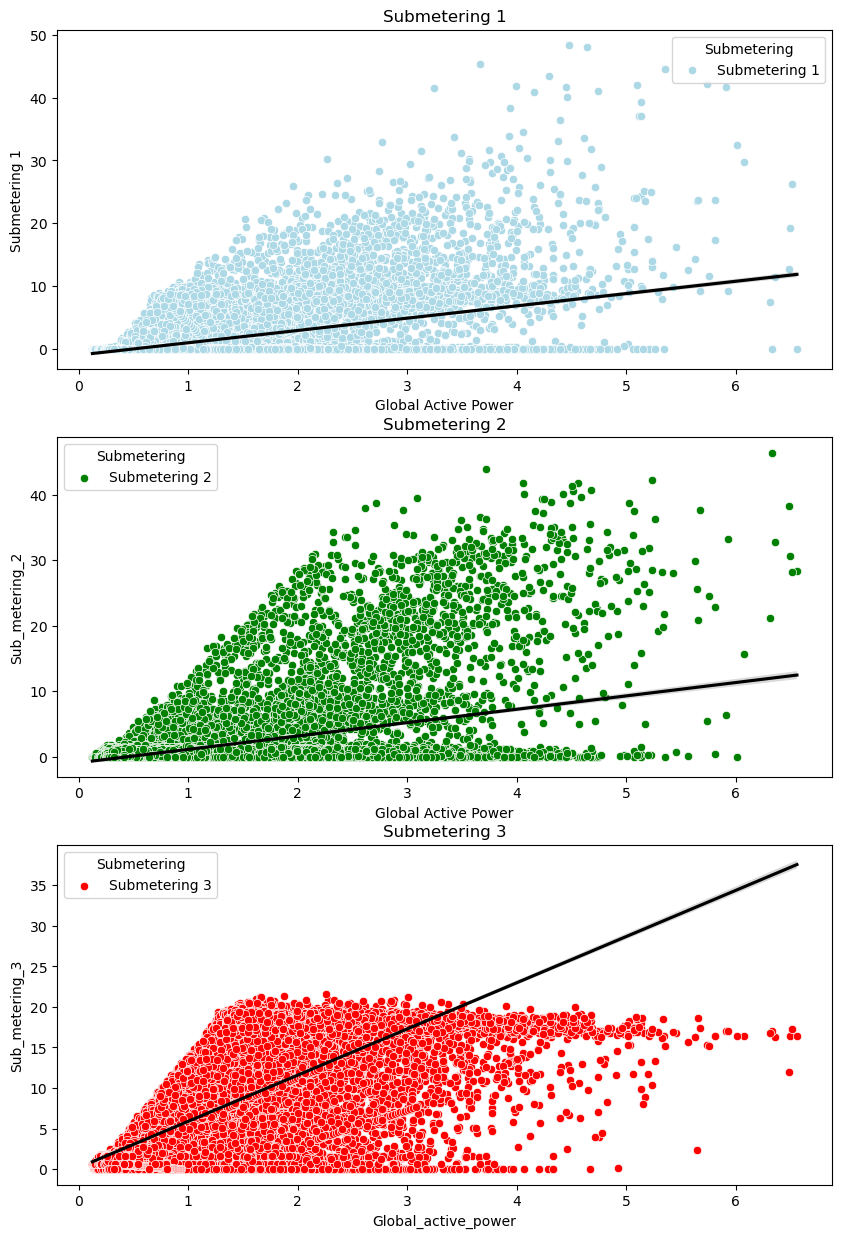

In [105]:
# lets remove the 4th empty subplot

# figure with 3 plots in a vertical lyout
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# global active power vs submetering 1
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_1', color='lightblue', label='Submetering 1', ax=axes[0])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_1', color='black', scatter=False, ax=axes[0])

# global active power vs submetering 2
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_2', color='green', label='Submetering 2', ax=axes[1])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_2', color='black', scatter=False, ax=axes[1])

# global active power vs submetering 3
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_3', color='red', label='Submetering 3', ax=axes[2])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_3', color='black', scatter=False, ax=axes[2])

# add legend, titles and label for each
axes[0].legend(title='Submetering')
axes[1].legend(title='Submetering')
axes[2].legend(title='Submetering')

axes[0].set_title('Submetering 1')
axes[0].set_xlabel('Global Active Power')
axes[0].set_ylabel('Submetering 1')

axes[1].set_title('Submetering 2')
axes[1].set_xlabel('Global Active Power')
axes[1].set_title('Submetering 2')

axes[2].set_title('Submetering 3')
axes[2].set_title('Global Active Power')
axes[2].set_title('Submetering 3')

# remove the empty one
fig.delaxes(axes[3])

plt.tight_layout()

plt.subplots()

IndexError: index 3 is out of bounds for axis 0 with size 3

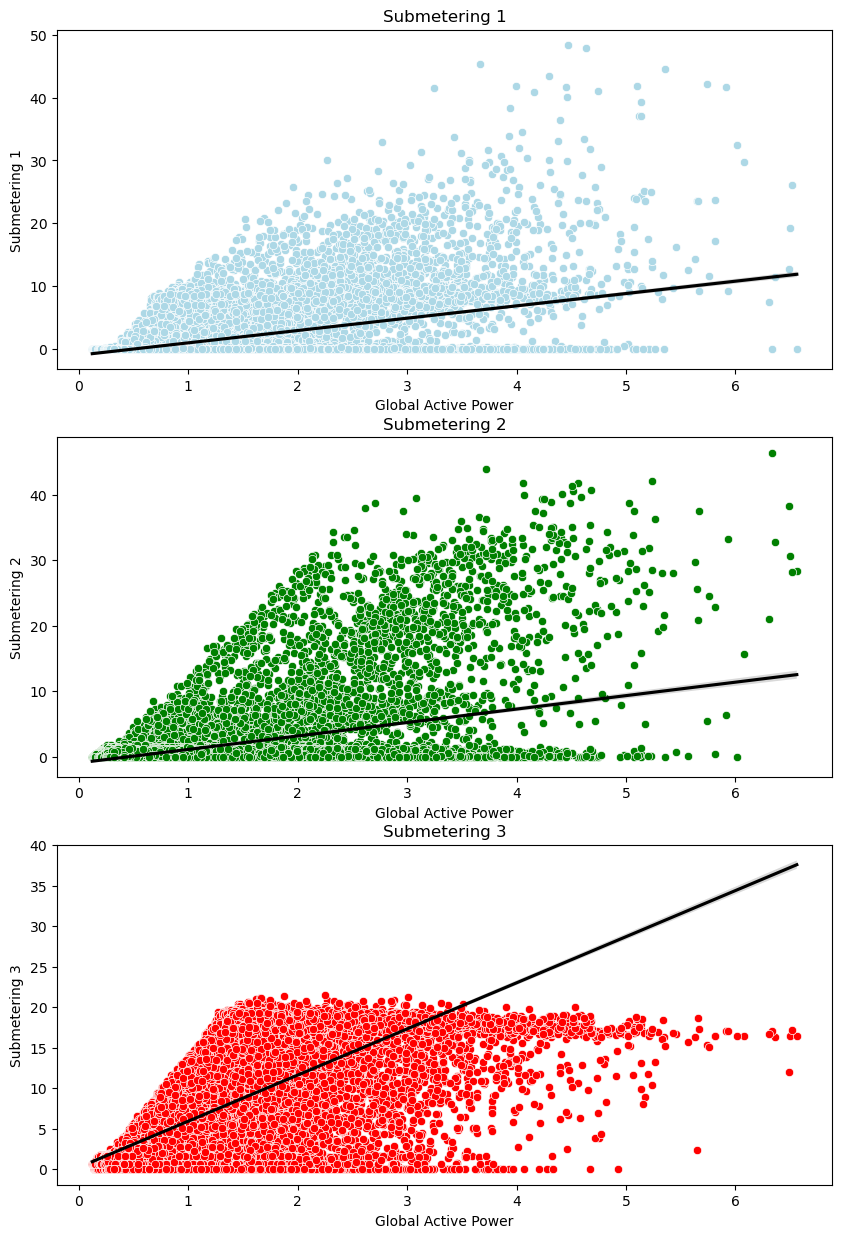

In [65]:
#Let modify further


# figure with 3 plots in a vertical lyout
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# global active power vs submetering 1
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_1', color='lightblue', ax=axes[0])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_1', color='black', scatter=False, ax=axes[0])

# global active power vs submetering 2
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_2', color='green', ax=axes[1])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_2', color='black', scatter=False, ax=axes[1])

# global active power vs submetering 3
sns.scatterplot(hourly_data, x='Global_active_power',y='Sub_metering_3', color='red', ax=axes[2])
sns.regplot(hourly_data, x='Global_active_power', y='Sub_metering_3', color='black', scatter=False, ax=axes[2])

# remove legend, only titles and label for each

axes[0].set_title('Submetering 1')
axes[0].set_xlabel('Global Active Power')
axes[0].set_ylabel('Submetering 1')

axes[1].set_title('Submetering 2')
axes[1].set_xlabel('Global Active Power')
axes[1].set_ylabel('Submetering 2')

axes[2].set_title('Submetering 3')
axes[2].set_xlabel('Global Active Power')
axes[2].set_ylabel('Submetering 3')

# remove the empty one
fig.delaxes(axes[3])

plt.tight_layout()

plt.subplots()

# Correlation heatmap

Correlation analysis is a statistical technique used to quantify the strength and direction of a linear relationship between two continuous variables. It helps understand whether and how two variables are related. Correlation coefficients can range from -1 to 1

<function matplotlib.pyplot.show(close=None, block=None)>

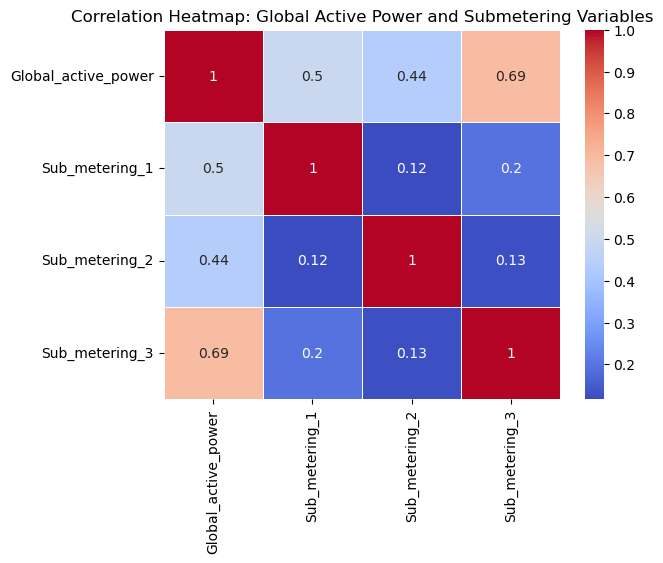

In [109]:
# calculate the correlation matrix
correlation_matrix = hourly_data[['Global_active_power', 'Sub_metering_1','Sub_metering_2', 'Sub_metering_3']].corr()

# create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap: Global Active Power and Submetering Variables')

plt.show

In [110]:
print(correlation_matrix)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
Global_active_power             1.000000        0.497813        0.438805   
Sub_metering_1                  0.497813        1.000000        0.116291   
Sub_metering_2                  0.438805        0.116291        1.000000   
Sub_metering_3                  0.694421        0.195677        0.125657   

                     Sub_metering_3  
Global_active_power        0.694421  
Sub_metering_1             0.195677  
Sub_metering_2             0.125657  
Sub_metering_3             1.000000  


From the output above:

Positive Correlation (r > 0): When one variable increases, the other tends to increase as well. The closer the correlation coefficient is to 1, the stronger the positive relationship.

Negative Correlation (r < 0): When one variable increases, the other tends to decrease. The closer the correlation coefficient is to -1, the stronger the negative relationship.

No Correlation (r = 0): There is no linear relationship between the variables.


By calculating the correlation coefficients between 'Global_active_power' and the sub-metering columns. Here's what the print(correlation_matrix) shows:

The correlation between 'Global_active_power' and 'Sub_metering_1' is 0.497813. This suggests a moderate positive correlation between these two variables.

The correlation between 'Global_active_power' and 'Sub_metering_2' is 0.438805. This indicates a moderate positive correlation as well.

The correlation between 'Global_active_power' and 'Sub_metering_3' is 0.694421. This suggests a relatively strong positive correlation.

These results indicate that 'Sub_metering_3' has the highest positive correlation with 'Global_active_power,' followed by 'Sub_metering_1' and 'Sub_metering_2.' This information can be valuable for understanding how sub-metering values relate to the global active power consumption in the home.

# General Additive Model (GAM)

I used GAM to investigate colinear relationships between variables. I had to use LabelEncoder as suggested by the notebook to transform the data into appropriate format (int or float)

In [111]:
hourly_data

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
timestamp,,,,,
2006-12-16 17:00:00,4.222889,0.00,0.527778,16.861111,2006
2006-12-16 18:00:00,3.632200,0.00,6.716667,16.866667,2006
2006-12-16 19:00:00,3.400233,0.00,1.433333,16.683333,2006
2006-12-16 20:00:00,3.268567,0.00,0.000000,16.783333,2006
2006-12-16 21:00:00,3.056467,0.00,0.416667,17.216667,2006
...,...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.35,0.000000,13.133333,2010
2010-12-11 20:00:00,1.753333,8.05,1.100000,10.066667,2010
2010-12-11 21:00:00,1.114900,8.55,0.450000,0.000000,2010


In [114]:
from pygam import LinearGAM

In [116]:
model = LinearGAM(n_splines=25).fit(hourly_data,'Global_active_power','Sub_metering_1')

ValueError: y data must be type int or float, but found type: <class 'numpy.str_'>
Try transforming data with a LabelEncoder first.

In [117]:
# lets transform the str type of sub_metering_(number) into numericals
from sklearn.preprocessing import LabelEncoder

In [118]:
label_encoder = LabelEncoder()
hourly_data['Global_active_power'] = label_encoder.fit_transform(hourly_data['Global_active_power'])
hourly_data['Sub_metering_1'] = label_encoder.fit_transform(hourly_data['Sub_metering_1'])
hourly_data['Sub_metering_2'] = label_encoder.fit_transform(hourly_data['Sub_metering_2'])
hourly_data['Sub_metering_3'] = label_encoder.fit_transform(hourly_data['Sub_metering_3'])

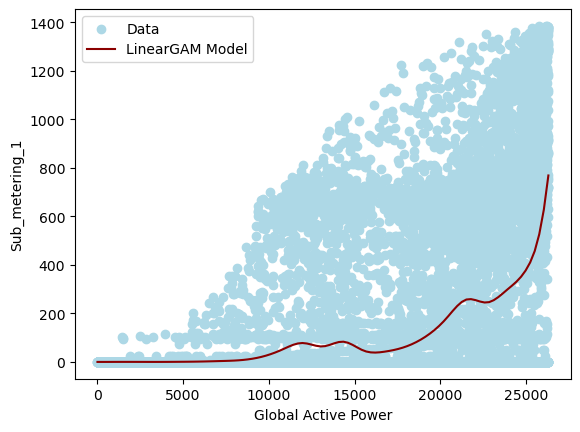

In [121]:
model = LinearGAM(n_splines=25).fit(hourly_data[['Global_active_power']], hourly_data[['Sub_metering_1']])

X_grid = model.generate_X_grid(term=0)

y_pred = model.predict(X_grid)

# Plot the data points and the model predictions
plt.scatter(hourly_data['Global_active_power'], hourly_data['Sub_metering_1'], label='Data', color='lightblue')
plt.plot(X_grid, y_pred, label='LinearGAM Model', color='darkred')
plt.xlabel('Global Active Power')
plt.ylabel('Sub_metering_1')
plt.legend()
plt.show()

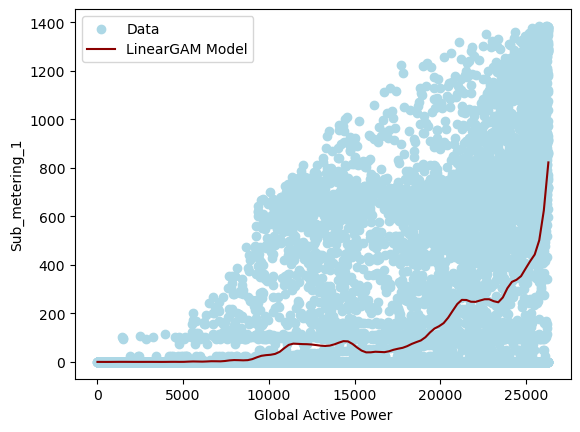

In [127]:

# Create a LinearGAM model
model = LinearGAM(n_splines=50)
model.fit(hourly_data[['Global_active_power']], hourly_data['Sub_metering_1'])

# Generate some sample data for plotting the model
X_grid = model.generate_X_grid(term=0)

# Predict the target variable using the model
y_pred = model.predict(X_grid)

# Plot the data points and the model predictions
plt.scatter(hourly_data['Global_active_power'], hourly_data['Sub_metering_1'], label='Data', color='lightblue')
plt.plot(X_grid, y_pred, label='LinearGAM Model', color='darkred')
plt.xlabel('Global Active Power')
plt.ylabel('Sub_metering_1')
plt.legend()
plt.show()

In [120]:
print(model)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)


# Feature engineering

lets forgo GAM and keep it simple. lets create time-based features that can capture daily, weekly, and seasonal patterns in the data when dealing with electricity consumption

Hour of the Day: Create a feature that represents the hour of the day when the electricity consumption was recorded.

Day of the Week: Add a feature indicating the day of the week (e.g., Monday, Tuesday, etc.).

Month: Include a feature indicating the month in which the data was recorded.

Weekend Indicator: Generate a binary feature to identify weekends (Saturday and Sunday).

In [17]:
# Create the time-series features by extracting features from timestamp index
#.. pd.to_datetime won't work with the time index - key word being index
# so we use df.index.___

# weekday // 5 used to determine whether a given day is a weekend (sat or sun) or weekday (mon to fri)
#  weekday // 5 will give '0' if 'weekday' is between 0 (mon) and 4 (fri) indicating weekday
# and will give '1' if 'weekday' is 5 (sat) or 6 (sun) indicating weekend
# so '0' for weekday and '1' fo weekend
hourly_data['hour_of_day'] = hourly_data.index.hour
hourly_data['day_of_week'] = hourly_data.index.dayofweek
hourly_data['month'] = hourly_data.index.month
hourly_data['weekend'] = hourly_data.index.weekday // 5
 


In [23]:
hourly_data


,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,hour_of_day,day_of_week,month,weekend
timestamp,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.00,0.527778,16.861111,2006,17,5,12,1
2006-12-16 18:00:00,3.632200,0.00,6.716667,16.866667,2006,18,5,12,1
2006-12-16 19:00:00,3.400233,0.00,1.433333,16.683333,2006,19,5,12,1
2006-12-16 20:00:00,3.268567,0.00,0.000000,16.783333,2006,20,5,12,1
2006-12-16 21:00:00,3.056467,0.00,0.416667,17.216667,2006,21,5,12,1
...,...,...,...,...,...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.35,0.000000,13.133333,2010,19,5,12,1
2010-12-11 20:00:00,1.753333,8.05,1.100000,10.066667,2010,20,5,12,1
2010-12-11 21:00:00,1.114900,8.55,0.450000,0.000000,2010,21,5,12,1


In [25]:
print(hourly_data.head())

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
timestamp                                                                  
2006-12-16 17:00:00             4.222889             0.0        0.527778   
2006-12-16 18:00:00             3.632200             0.0        6.716667   
2006-12-16 19:00:00             3.400233             0.0        1.433333   
2006-12-16 20:00:00             3.268567             0.0        0.000000   
2006-12-16 21:00:00             3.056467             0.0        0.416667   

                     Sub_metering_3  year  hour_of_day  day_of_week  month  \
timestamp                                                                    
2006-12-16 17:00:00       16.861111  2006           17            5     12   
2006-12-16 18:00:00       16.866667  2006           18            5     12   
2006-12-16 19:00:00       16.683333  2006           19            5     12   
2006-12-16 20:00:00       16.783333  2006           20            5     12   

In [26]:
# Check and see if created features worked
filtered_data = hourly_data[hourly_data['Global_active_power'] > 3]
print(filtered_data)

                     Global_active_power  Sub_metering_1  Sub_metering_2  \
timestamp                                                                  
2006-12-16 17:00:00             4.222889        0.000000        0.527778   
2006-12-16 18:00:00             3.632200        0.000000        6.716667   
2006-12-16 19:00:00             3.400233        0.000000        1.433333   
2006-12-16 20:00:00             3.268567        0.000000        0.000000   
2006-12-16 21:00:00             3.056467        0.000000        0.416667   
...                                  ...             ...             ...   
2010-11-20 19:00:00             3.259700        9.733333        1.516667   
2010-11-22 10:00:00             3.105367        8.866667       18.483333   
2010-11-22 18:00:00             3.168300       19.933333        0.000000   
2010-12-01 13:00:00             3.273433        0.000000       27.616667   
2010-12-05 17:00:00             3.076067        0.000000       27.150000   

           

# Lagged Features

Create lag features to capture past values of electricity consumption. For example, you can create lag features for "Global_active_power" with different lag periods (e.g., one hour ago, one day ago, one week ago). These lag features can help the model capture temporal dependencies.


To illustrate the concept of lags: 
Let's say you have hourly electricity consumption data for a household. The data includes a timestamp and the amount of electricity consumed at each hour. Each data point represents an hour of the day. To forecast future electricity consumption, you can create lag features by using past values of electricity consumption.


For instance, if you want to predict the electricity consumption at the next hour (t+1), you can create a lag feature that uses the electricity consumption at the previous hour (t-1) as a predictor. This lag feature would be a "1-hour lag." Similarly, if you believe that electricity consumption tends to follow a pattern over a 24-hour cycle, you can create additional lag features, such as a "2-hour lag," "3-hour lag," and so on, representing the electricity consumption values from two hours ago, three hours ago, and so forth.

Lag features allow your forecasting model to capture how past values of a variable influence its future values. By including lag features in your model, you can account for trends, seasonality, and other temporal patterns in the data.

In summary, lags are time-shifted versions of a variable that serve as input features in time series forecasting. They help the model learn from historical data to make predictions about future values of the variable.

In [18]:
# defining the no of lags
num_lags = 24
lag_columns = ['Global_active_power','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# create lag features for Global_active_power by iterating using loop through each column
for column in lag_columns:
    # then lag features created for the current column
    for i in range (1, num_lags + 1):
        # then create a new column with lagged values adapted from the current column
        hourly_data[f"{column}_lag{i}"] = hourly_data[column].shift(i)

# remove rows with NaN values resulting from lags        
hourly_data.dropna(inplace=True)

C:\Users\digit\AppData\Local\Temp\ipykernel_31056\3951885756.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hourly_data[f"{column}_lag{i}"] = hourly_data[column].shift(i)


for column in lag_columns::

This is a for loop that iterates through a list of columns defined in lag_columns. The loop will go through each column name one by one.

# Create lag features for the current column:

This is a comment (denoted by #) that provides a brief explanation of the following code block. It's not actual code execution but a description for the reader.
for i in range(1, num_lags + 1)::

This is another for loop. It iterates through a range of numbers starting from 1 and ending at num_lags + 1. The loop variable i takes on values from 1 to num_lags.

# Create a new column with lagged values:

Another comment that explains the purpose of the upcoming code block.

hourly_data[f"{column}_lag_{i}"] = hourly_data[column].shift(i):

This line of code performs several actions:
hourly_data[column] retrieves the values from the current column specified by the loop variable column. For example, if column is "Global_active_power," it retrieves the values from the "Global_active_power" column.

.shift(i) shifts (lags) the values in the column upward by i positions. This effectively creates a new column where each value is replaced by the value that occurred i time steps ago.

hourly_data[f"{column}_lag_{i}"] is the new column that is created to store these lagged values. Its name is constructed using the original column name (e.g., "Global_active_power") and the lag number (e.g., "lag_1"). This results in columns like "Global_active_power_lag_1," "Global_active_power_lag_2," and so on.

In [19]:
hourly_data

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour_of_day,day_of_week,month,weekend,Global_active_power_lag1,Global_active_power_lag2,...,Sub_metering_3_lag15,Sub_metering_3_lag16,Sub_metering_3_lag17,Sub_metering_3_lag18,Sub_metering_3_lag19,Sub_metering_3_lag20,Sub_metering_3_lag21,Sub_metering_3_lag22,Sub_metering_3_lag23,Sub_metering_3_lag24
timestamp,,,,,,,,,,,,,,,,,,,,,
2006-12-17 17:00:00,3.406767,0.00,0.466667,16.816667,17,6,12,1,3.326033,2.985400,...,0.000000,0.000000,0.000000,0.0,4.433333,17.216667,16.783333,16.683333,16.866667,16.861111
2006-12-17 18:00:00,3.697100,0.00,0.000000,16.833333,18,6,12,1,3.406767,3.326033,...,0.000000,0.000000,0.000000,0.0,0.000000,4.433333,17.216667,16.783333,16.683333,16.866667
2006-12-17 19:00:00,2.908400,0.00,0.516667,16.683333,19,6,12,1,3.697100,3.406767,...,8.883333,0.000000,0.000000,0.0,0.000000,0.000000,4.433333,17.216667,16.783333,16.683333
2006-12-17 20:00:00,3.361500,0.00,1.116667,17.116667,20,6,12,1,2.908400,3.697100,...,4.650000,8.883333,0.000000,0.0,0.000000,0.000000,0.000000,4.433333,17.216667,16.783333
2006-12-17 21:00:00,3.040767,0.00,1.200000,17.500000,21,6,12,1,3.361500,2.908400,...,0.000000,4.650000,8.883333,0.0,0.000000,0.000000,0.000000,0.000000,4.433333,17.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-11 19:00:00,2.391967,0.35,0.000000,13.133333,19,5,12,1,2.280867,2.456100,...,0.000000,0.000000,0.000000,0.0,9.183333,0.650000,2.733333,5.116667,8.266667,2.500000
2010-12-11 20:00:00,1.753333,8.05,1.100000,10.066667,20,5,12,1,2.391967,2.280867,...,0.000000,0.000000,0.000000,0.0,0.000000,9.183333,0.650000,2.733333,5.116667,8.266667
2010-12-11 21:00:00,1.114900,8.55,0.450000,0.000000,21,5,12,1,1.753333,2.391967,...,4.300000,0.000000,0.000000,0.0,0.000000,0.000000,9.183333,0.650000,2.733333,5.116667


# Data Splitting

This is critical in machine learning and time series forecasting; dividing dataset into seperate sets: training data (largest dataset to train the forecasting model), validation data (to evaluate the model's performance), and testing data (for evaluating the model's forecasting and accuracy; essential to be used by the model that has NEVER seen before to simulate real-world forecasting scenarios).

In [16]:
# DEFINE the size of each split
train_size = int(0.7 * len(hourly_data)) # 70% for training
val_size = int(0.15 * len(hourly_data)) # 15% for validation
test_size = len(hourly_data) - train_size - val_size # remaining 15% for testing

# SPLIT the data using definitions 
#  hourly_data[definition:definiton]
train_data = hourly_data[:train_size]
val_data = hourly_data[train_size:val_size + val_size]
test_data = hourly_data[train_size + val_size:]

# reset the index of each split to have clean indexes
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Data preprocessing

Lets use Augmented Dickey-Fuller test to check stationarity like filling missing values and sometimes transforming your data

The adfuller function expects a 1-dimensional array-like input. When you pass a DataFrame with multiple columns, you're providing a 2-dimensional object. To conduct the Augmented Dickey-Fuller test on each column separately, you can loop through the columns. Key word being loop.

However, as shown in the data outputs below, I failed to achieve what I want.

In [31]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller(hourly_data[['Global_active_power','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], autolag='AIC')

adf_statistics = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistics}')
print(f'p-value: {p_value}')
print(f'Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ValueError: x is required to have ndim 1 but has ndim 2

In [39]:
from statsmodels.tsa.stattools import adfuller

# List of columns you want to test
columns_to_test = ['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_to_test:
    result = adfuller(hourly_data[column], autolag='AIC')
    adf_statistics = result[0]
    p_value = result[1]
    critical_values = result[4]

    print(f'ADF Statistic for {column}: {adf_statistics}')
    print(f'p-value for {column}: {p_value}')
    print(f'Critical Values for {column}: {critical_values}')
    for key, value in critical_values.items():
        print(f'{key}: {value}')
    print('\n')


ADF Statistic for Global_active_power: -16.781942908260316
p-value for Global_active_power: 1.2621308563996266e-29
Critical Values for Global_active_power: {'1%': -3.4305445210992387, '5%': -2.8616259734078637, '10%': -2.5668157609622684}
1%: -3.4305445210992387
5%: -2.8616259734078637
10%: -2.5668157609622684


ADF Statistic for Sub_metering_1: -23.618341959828967
p-value for Sub_metering_1: 0.0
Critical Values for Sub_metering_1: {'1%': -3.4305445153130947, '5%': -2.8616259708506178, '10%': -2.5668157596011114}
1%: -3.4305445153130947
5%: -2.8616259708506178
10%: -2.5668157596011114


ADF Statistic for Sub_metering_2: -24.94267173358808
p-value for Sub_metering_2: 0.0
Critical Values for Sub_metering_2: {'1%': -3.4305445037418387, '5%': -2.861625965736583, '10%': -2.5668157568790413}
1%: -3.4305445037418387
5%: -2.861625965736583
10%: -2.5668157568790413


ADF Statistic for Sub_metering_3: -17.388889112987368
p-value for Sub_metering_3: 5.022740704791198e-30
Critical Values for Sub_m

The Augmented Dickey-Fuller test results indicate that all the series, including 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3', are stationary. The p-values are very close to zero, which means you can reject the null hypothesis that the series are non-stationary.

This is a good sign for time series analysis because stationary data is easier to work with and makes modeling more reliable. You can proceed with modeling these time series data using techniques like ARIMA for forecasting.

# Autocorrelation and Partial autocorrelation plots with ARIMA

Determine the order of differencing (d), autoregressive order (p), and moving average order (q) in an ARIMA model. This is to find and select model

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<function matplotlib.pyplot.show(close=None, block=None)>

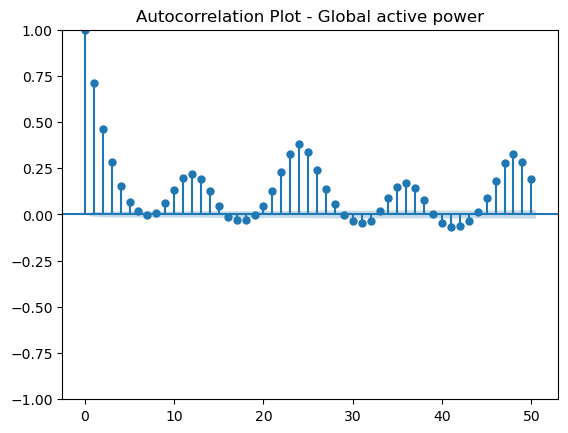

In [21]:
plot_acf(hourly_data['Global_active_power'], lags=50)
plt.title('Autocorrelation Plot - Global active power')
plt.show

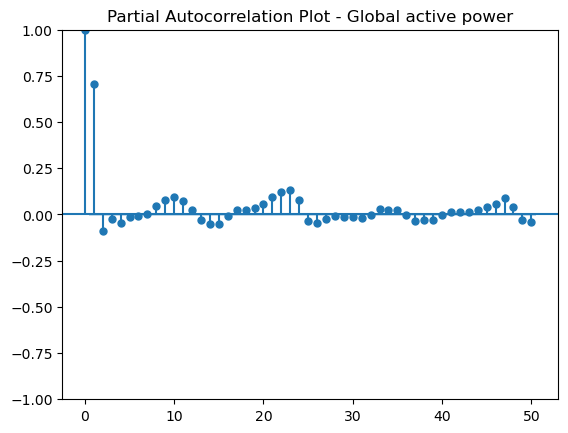

In [56]:
plot_pacf(hourly_data['Global_active_power'], lags= 50)
plt.title('Partial Autocorrelation Plot - Global active power')
plt.show()

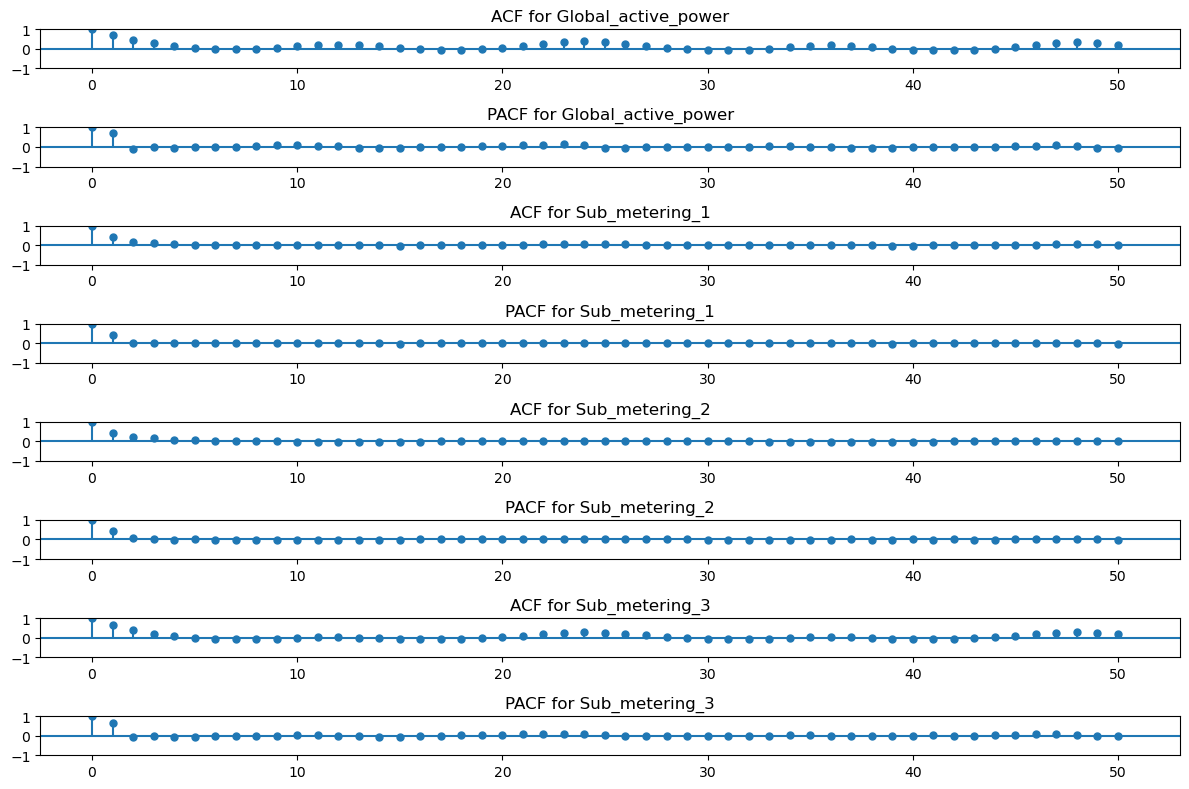

In [48]:
columns_to_plot =['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

num_lags = 50

fig, axes = plt.subplots(len(columns_to_plot) * 2, 1, figsize=(12, 8))

for i, column in enumerate (columns_to_plot):
    plot_acf(hourly_data[column], ax=axes[i * 2], lags=num_lags, title=f'ACF for {column}')
    
    plot_pacf(hourly_data[column], ax=axes[i * 2 + 1], lags=num_lags, title=f'PACF for {column}')
                       
plt.tight_layout()
plt.show()

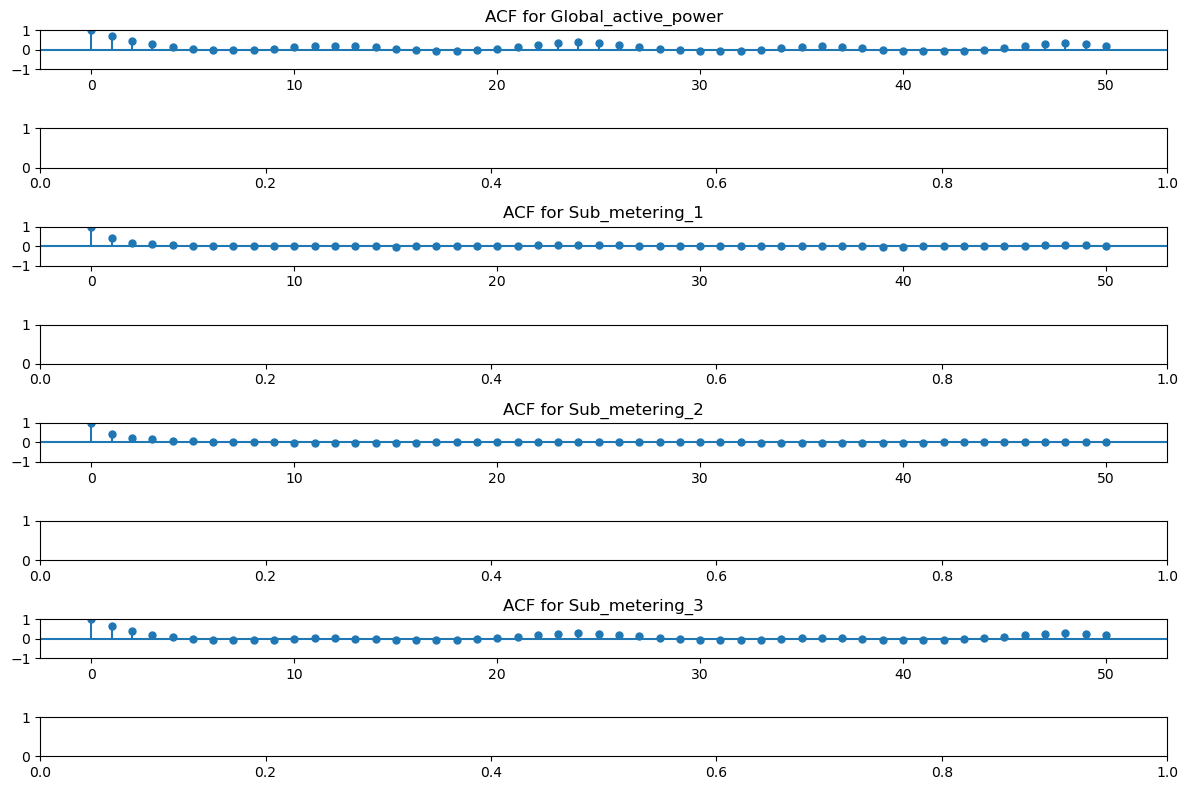

In [49]:
columns_to_plot =['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

num_lags = 50

fig, axes = plt.subplots(len(columns_to_plot) * 2, 1, figsize=(12, 8))

for i, column in enumerate (columns_to_plot):
    plot_acf(hourly_data[column], ax=axes[i * 2], lags=num_lags, title=f'ACF for {column}')
    
                       
plt.tight_layout()
plt.show()

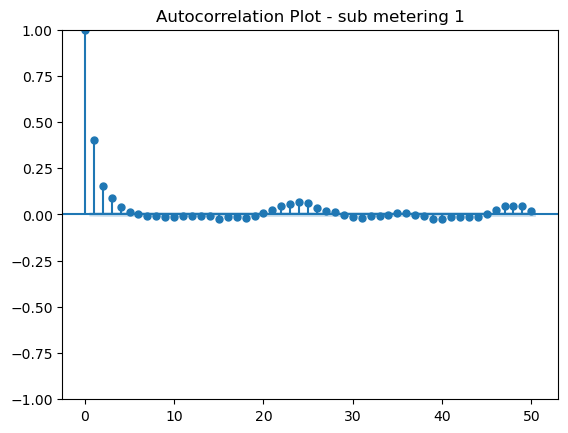

In [58]:
plot_acf(hourly_data['Sub_metering_1'], lags= 50)
plt.title('Autocorrelation Plot - sub metering 1')
plt.show()

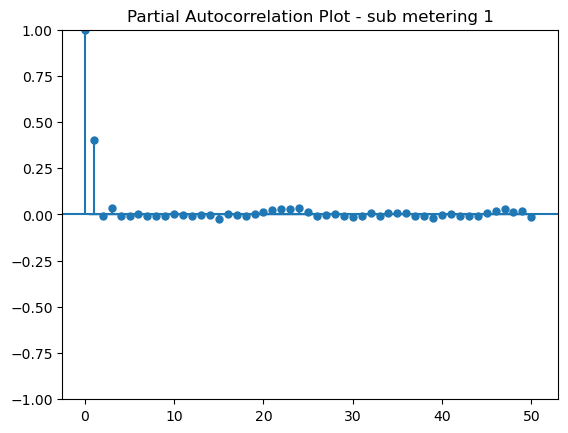

In [59]:
plot_pacf(hourly_data['Sub_metering_1'], lags= 50)
plt.title('Partial Autocorrelation Plot - sub metering 1')
plt.show()

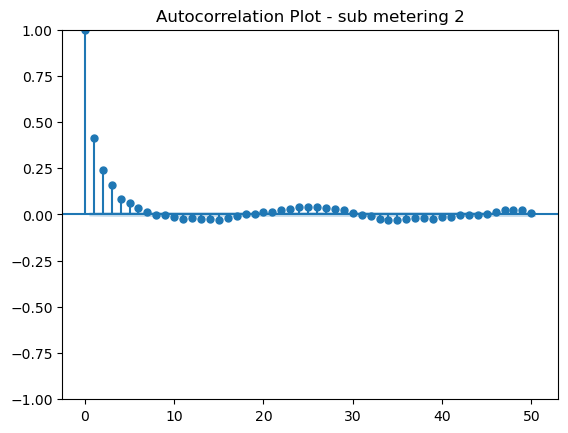

In [61]:
plot_acf(hourly_data['Sub_metering_2'], lags= 50)
plt.title('Autocorrelation Plot - sub metering 2')
plt.show()

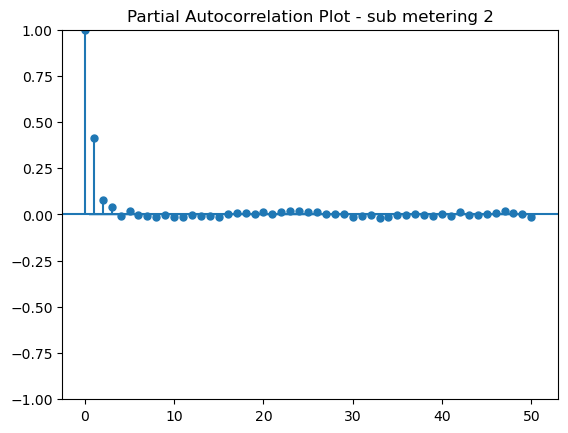

In [62]:
plot_pacf(hourly_data['Sub_metering_2'], lags= 50)
plt.title('Partial Autocorrelation Plot - sub metering 2')
plt.show()

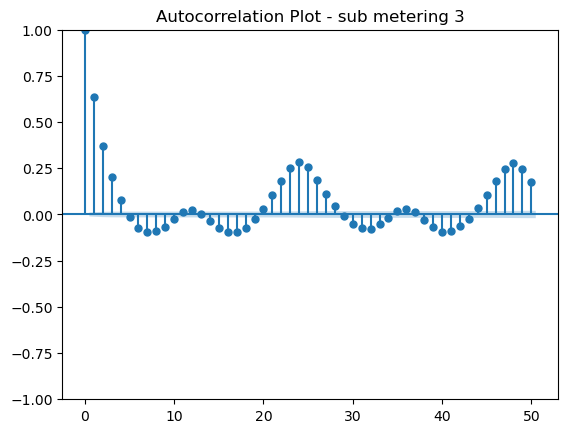

In [63]:
plot_acf(hourly_data['Sub_metering_3'], lags= 50)
plt.title('Autocorrelation Plot - sub metering 3')
plt.show()

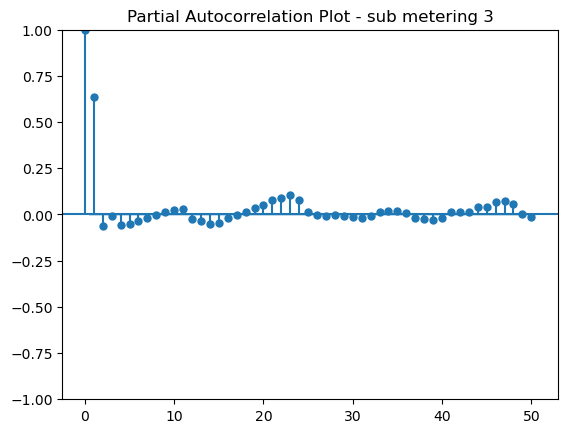

In [64]:
plot_pacf(hourly_data['Sub_metering_3'], lags= 50)
plt.title('Partial Autocorrelation Plot - sub metering 3')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


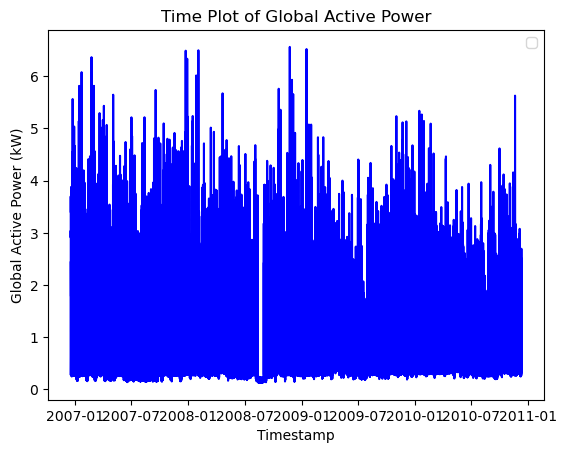

In [69]:
plt.plot(hourly_data['Global_active_power'], color='blue')
plt.title('Time Plot of Global Active Power')
plt.xlabel('Timestamp')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

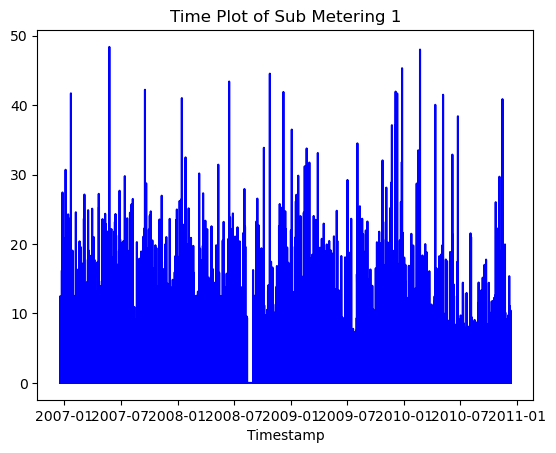

In [68]:
plt.plot(hourly_data['Sub_metering_1'], color='blue')
plt.title('Time Plot of Sub Metering 1')
plt.xlabel('Timestamp')
plt.show()

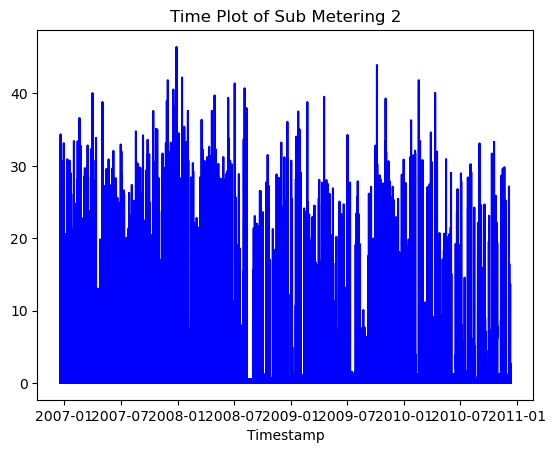

In [70]:
plt.plot(hourly_data['Sub_metering_2'], color='blue')
plt.title('Time Plot of Sub Metering 2')
plt.xlabel('Timestamp')
plt.show()

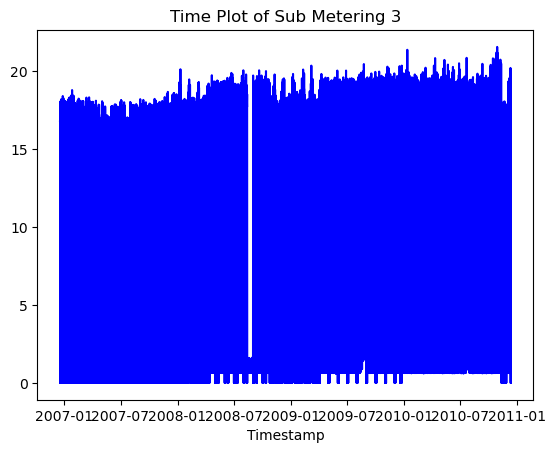

In [71]:
plt.plot(hourly_data['Sub_metering_3'], color='blue')
plt.title('Time Plot of Sub Metering 3')
plt.xlabel('Timestamp')
plt.show()

In [74]:
from statsmodels.tsa.arima_model import ARIMA

# 'p' (AR order): 1
# 'd' (I order): 0
# 'q' (MA order): 0

In [80]:
global_model = ARIMA(train_data['Global_active_power'], order=(1, 0, 0))
fitted_global_model = global_model.fit

global_predictions = fitted_global_model.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1, dynamic=False)


AttributeError: 'function' object has no attribute 'predict'

In [78]:
global_predictions = fitted_global_model.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1, dynamics=False)

AttributeError: 'function' object has no attribute 'predict'

In [76]:
from sklearn.metrics import mean_squared_squared_error
global_mse = mean_squared_error(val_data['Global_active_power'], predictions)
global_rmse = np.sqrt(global_mse)

In [81]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model to the training data
global_model = ARIMA(train_data['Global_active_power'], order=(1, 0, 0))
fitted_global_model = global_model.fit()

# Make predictions on the validation data
global_predictions = fitted_global_model.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1, dynamic=False)


ValueError: Prediction must have `end` after `start`.

In [83]:
# Fit the ARIMA model to the training data
global_model = ARIMA(train_data['Global_active_power'], order=(1, 0, 0))
fitted_global_model = global_model.fit()

# Make predictions on the validation data
global_predictions = fitted_global_model.get_forecast(start=len(train_data), end=len(train_data) + len(val_data) - 1)

TypeError: statsmodels.tsa.statespace.mlemodel.MLEResults.get_prediction() got multiple values for keyword argument 'start'

In [84]:
# Fit the ARIMA model to the training data
global_model = ARIMA(train_data['Global_active_power'], order=(1, 0, 0))
fitted_global_model = global_model.fit()

# Make predictions on the validation data
global_predictions = fitted_global_model.get_forecast(steps=len(val_data))

ValueError: Prediction must have `end` after `start`.

In [85]:
# Fit the ARIMA model to the training data
global_model = ARIMA(train_data['Global_active_power'], order=(1, 0, 0))
fitted_global_model = global_model.fit()

# Make predictions on the validation data
global_predictions = fitted_global_model.get_forecast(steps=len(val_data))

# Extract the predicted values
global_predictions_mean = global_predictions.predicted_mean

ValueError: Prediction must have `end` after `start`.

# Issue with ARIMA

I decided to go wtih pmdarima importing auto_arima

In [86]:
from pmdarima import auto_arima

In [ ]:
# Fit an AutoARIMA model
stepwise_fit = auto_arima(hourly_data['Global_active_power'], seasonal=True, m=24, stepwise=True)


MemoryError: Unable to allocate 201. MiB for an array with shape (28, 28, 33674) and data type float64

# Linear Regression Model

I failed to use ARIMA and auto_arima due to memory limitation of my PC, so instead I did.

I specified your target variable ('Global_active_power') and selected a set of feature columns (['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']) from your hourly_data DataFrame.

I split the data into training and testing subsets using the train_test_split function, reserving 20% of the data for testing.
I created a Linear Regression model using LinearRegression() from scikit-learn.

The model was fitted to the training data using model.fit(X_train, y_train). I used the trained model to make predictions on the test data with model.predict(X_test).

Finally, I calculated the Mean Squared Error (MSE) between the actual y_test values and the predicted y_pred values to evaluate the model's performance. As shown below, a lower MSE value of 0.222234726012032 is indicative of a better fit.  

But, let's refine the model by trying slightly complex Random Forest Regression.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Global_active_power' is your target variable and you want to predict it
target_column = 'Global_active_power'
feature_columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']  # Replace with your actual feature column names

# Split the data into features and target
X = hourly_data[feature_columns]
y = hourly_data[target_column]

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.222234726012032


In [29]:
hourly_data.reset_index(inplace=True)

# Create a new DataFrame with selected columns
selected_columns = ['Global_active_power', 'timestamp', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3','hour_of_day', 'day_of_week','month','weekend']
filtered_data = hourly_data[selected_columns]

# Save the filtered data to a CSV file
filtered_data.to_csv('hourly_data_filtered.csv', index=False)

This filtered data saved as CSV is to be used for Power BI...

In [28]:
print(hourly_data.columns)

Index(['Global_active_power', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour_of_day', 'day_of_week', 'month', 'weekend',
       'Global_active_power_lag1', 'Global_active_power_lag2',
       ...
       'Sub_metering_3_lag15', 'Sub_metering_3_lag16', 'Sub_metering_3_lag17',
       'Sub_metering_3_lag18', 'Sub_metering_3_lag19', 'Sub_metering_3_lag20',
       'Sub_metering_3_lag21', 'Sub_metering_3_lag22', 'Sub_metering_3_lag23',
       'Sub_metering_3_lag24'],
      dtype='object', length=104)


# Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor


In [31]:
target_column = 'Global_active_power'
feature_columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [34]:
model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error {mse}")

Mean Squared Error 0.23382798900417073


The Mean Squared Error (MSE) gives us an idea of how well the model performs on the test data. Lower MSE values indicate better predictive performance

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
}

# Grid Search Cross-Validation:

Use grid search with cross-validation to systematically search through a range of hyperparameter values.
Define a set of possible values for each hyperparameter you want to tune.
Grid search will evaluate all possible combinations of hyperparameters and select the best set.

In [36]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [38]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
Best Estimator: RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=150,
                      random_state=42)


In [40]:
best_mse = -grid_search.best_score_  # Convert negative score to MSE
print("Best Mean Squared Error:", best_mse)

Best Mean Squared Error: 0.2071729563474231


# The best identified parameters for Random Forest Regression Model

# Random Regression Model is the best model
Best Parameters and Estimator as follows for said model --
max_depth: 10
min_samples_split: 10
n_estimators: 150


The mean squared error of 0.2071 indicates that your RandomForestRegressor model with the GridSearchCV is performing well, and the predictions are quite accurate. Lower mean squared error values suggest a better fit to the data.

# Predictive Accuracy of the Random Forest Regression Model using grid_search

We calculate metrics such as R-squared (R²), Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for your regression models. These metrics provide insights into the accuracy and performance of your predictive models.

The following metrics

R-squared (R²): This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates better model accuracy.

Mean Absolute Error (MAE): It measures the average absolute difference between predicted and actual values. Smaller MAE values indicate better accuracy.

Mean Squared Error (MSE): It calculates the average squared difference between predicted and actual values. Lower MSE values are indicative of better accuracy.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE, providing a measure of the standard deviation of prediction errors. Lower RMSE values suggest more accurate predictions.


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have already trained your Random Forest model
# Make predictions
y_pred = grid_search.predict(X_test)  # Replace X_test with your test data

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

By calculating and comparing these metrics for different models, you can determine the predictive accuracy of each model and choose the one with the best performance.

R-squared: 0.7407935996365658
Mean Absolute Error: 0.3195727033666731
Mean Squared Error: 0.20971274502484694
Root Mean Squared Error: 0.4579440413684263
